<a href="https://colab.research.google.com/github/Muppasaisrija/Muppa_NFO5731_-SPRING2022/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
data = pd.read_csv("/content/train_data.csv")
data = data.head(10000)
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()
data['Lower Case'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [ ]:
texts = []
for line in data['Stemming']:
  texts.append(line)
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['someon', 'work', 'mani', 'museum', 'eager', 'visit', 'galleri', 'recent', 'trip', 'la_vega', 'saw', 'show', 'infam', 'egg', 'hous', 'faberg', 'virginia', 'museum', 'fine', 'art', 'vmfa', 'knew', 'go', 'tuck_away', 'near', 'gelateria', 'garden', 'galleri', 'pretti', 'much', 'hidden', 'view', 's', 'real_estat_agent', 'call', 'cozi', 'charm', 'basic', 'euphem', 'small', 'said', 'can', 'still', 'see', 'wonder', 'art_galleri', 'size', 'two', 's', 'ask', 'let', 'tell', 'price', 'rel', 'inexpens', 'la_vega', 'attract', 'complet', 'top', 'space', 'amount', 'art', 'can', 'fit', 'bit', 'much', 's', 'kid', 'friendli', 'serious', 'don', 't', 'bring', 'secur', 'train', 'properli', 'show', 'curat', 'design', 'team', 'collabor', 'exhibit', 'definit', 'flow', 'mean', 'visitor', 'view', 'art', 'certain', 'sequenc', 'whether', 'histor', 'period', 'cultur', 'signific', 'audio', 'guid', 'usual', 'develop', 'arriv', 'galleri', 'tell', 'start', 'secur', 'certainli', 'help', 'told', 'just', 'look', 'around

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['someon', 'eager', 'visit', 'recent', 'trip', 'see', 'show', 'infam', 'egg', 'hous', 'fine', 'art', 'vmfa', 'know', 'go', 'gelateria', 'garden', 'galleri', 'pretti', 'much', 'hidden', 'view', 'agent', 'call', 'cozi', 'charm', 'basic', 'small', 'say', 'can', 'still', 'see', 'wonder', 'size', 's', 'ask', 'let', 'tell', 'price', 'complet', 'top', 'space', 'amount', 'art', 'can', 'fit', 'bit', 'much', 'kid', 'serious', 'bring', 'train', 'design', 'team', 'collabor', 'exhibit', 'definit', 'flow', 'visitor', 'view', 'art', 'certain', 'sequenc', 'histor', 'period', 'audio', 'usual', 'develop', 'help', 'tell', 'just', 'look', 'fine', 'institut', 'find', 'lack', 'respect']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('agent', 1),
  ('amount', 1),
  ('art', 3),
  ('ask', 1),
  ('audio', 1),
  ('basic', 1),
  ('bit', 1),
  ('bring', 1),
  ('call', 1),
  ('can', 2),
  ('certain', 1),
  ('charm', 1),
  ('collabor', 1),
  ('complet', 1),
  ('cozi', 1),
  ('definit', 1),
  ('design', 1),
  ('develop', 1),
  ('eager', 1),
  ('egg', 1),
  ('exhibit', 1),
  ('find', 1),
  ('fine', 2),
  ('fit', 1),
  ('flow', 1),
  ('galleri', 1),
  ('garden', 1),
  ('gelateria', 1),
  ('go', 1),
  ('help', 1),
  ('hidden', 1),
  ('histor', 1),
  ('hous', 1),
  ('infam', 1),
  ('institut', 1),
  ('just', 1),
  ('kid', 1),
  ('know', 1),
  ('lack', 1),
  ('let', 1),
  ('look', 1),
  ('much', 2),
  ('period', 1),
  ('pretti', 1),
  ('price', 1),
  ('recent', 1),
  ('respect', 1),
  ('s', 1),
  ('say', 1),
  ('see', 2),
  ('sequenc', 1),
  ('serious', 1),
  ('show', 1),
  ('size', 1),
  ('small', 1),
  ('someon', 1),
  ('space', 1),
  ('still', 1),
  ('team', 1),
  ('tell', 2),
  ('top', 1),
  ('train', 1),
  ('trip', 1),
 

# The lda model

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.136*"room" + 0.091*"stay" + 0.059*"insid" + 0.055*"hotel" + 0.042*"wasn" '
  '+ 0.030*"weekend" + 0.027*"crowd" + 0.020*"cake" + 0.020*"casino" + '
  '0.018*"bathroom"'),
 (1,
  '0.040*"go" + 0.039*"good" + 0.035*"place" + 0.031*"time" + 0.030*"get" + '
  '0.027*"come" + 0.025*"great" + 0.024*"will" + 0.023*"just" + 0.022*"make"'),
 (2,
  '0.111*"store" + 0.083*"dog" + 0.058*"understand" + 0.042*"mention" + '
  '0.028*"honestli" + 0.025*"tire" + 0.024*"mani" + 0.022*"smell" + '
  '0.018*"afternoon" + 0.017*"cloth"'),
 (3,
  '0.137*"special" + 0.062*"play" + 0.033*"pricey" + 0.028*"event" + '
  '0.026*"doctor" + 0.023*"fee" + 0.022*"straight" + 0.018*"bone" + '
  '0.017*"child" + 0.016*"detail"'),
 (4,
  '0.035*"hold" + 0.034*"pool" + 0.032*"offic" + 0.028*"origin" + '
  '0.025*"follow" + 0.020*"young" + 0.019*"corner" + 0.018*"wear" + '
  '0.017*"cashier" + 0.017*"forev"'),
 (5,
  '0.023*"hear" + 0.022*"deal" + 0.016*"impress" + 0.015*"soon" + '
  '0.015*"burger" + 0.015*"loc

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.172431360137933

Coherence Score:  0.35519954075493354


# The lsa model

In [ ]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

In [ ]:
pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '0.284*"go" + 0.255*"good" + 0.238*"get" + 0.225*"time" + 0.217*"place" + '
  '0.206*"come" + 0.204*"food" + 0.195*"order" + 0.190*"just" + 0.165*"will"'),
 (1,
  '0.485*"good" + 0.406*"food" + 0.227*"place" + -0.223*"go" + -0.196*"say" + '
  '-0.185*"tell" + -0.182*"call" + 0.164*"order" + -0.162*"time" + '
  '0.149*"great"'),
 (2,
  '0.633*"order" + -0.380*"good" + 0.285*"come" + 0.235*"food" + '
  '-0.214*"place" + -0.167*"go" + -0.141*"great" + -0.121*"can" + 0.117*"wait" '
  '+ 0.114*"tabl"'),
 (3,
  '-0.554*"go" + 0.492*"good" + -0.439*"place" + -0.274*"food" + 0.238*"get" + '
  '-0.159*"great" + 0.132*"come" + 0.110*"time" + 0.067*"room" + '
  '-0.066*"back"'),
 (4,
  '-0.623*"go" + 0.416*"place" + -0.416*"good" + 0.293*"great" + 0.169*"come" '
  '+ 0.168*"get" + -0.151*"order" + 0.122*"room" + 0.078*"can" + 0.075*"love"'),
 (5,
  '-0.698*"time" + 0.469*"get" + -0.241*"great" + 0.240*"place" + 0.146*"say" '
  '+ -0.145*"food" + 0.126*"just" + -0.123*"will" + 0.121*"order"

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

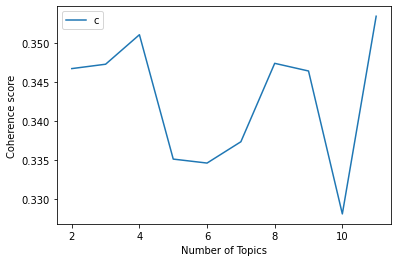

In [ ]:
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# **Summarization of Topics**

**LDA**


Reviews of pool pffice cashier

Reviews of birthday products and burger deals

Reviews of last week wine prices

Reviews of door and nail fix expenses

Reviews of customer care phone calls

Reviews of car problems

Sandwich reviews

Reviews of meat, fish and steak

Reviews of Green veggie pasta kid buffets

Reviews of spinach pizza

Reviews of house treat

Reviews of delicious lunch

Reviews of walk, help

Reviews of chicken flavor breakfast

Reviews of need to pay per use

Recommendations of new game

**LSA**

Go and get good food place

Great place to order food

Reviews about hostel stay

Reviews about good place to eat

Reviews about room stay

Car Reviews

Good place and price to drink and as well as to work

Come, place and order

Good prices for drink

Reviews about eat drink and call


# **Question 2: Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
data = data.dropna()
def review_classification(rating):
    if rating == 5:
      return 'Very Positive'
    elif rating == 4:
      return 'Positive'
    elif rating == 3:
      return 'Neutral'
    elif rating == 2:
      return 'Negative'
    elif rating == 1:
      return 'Very Negative'

rating_classification = data['stars'].map(review_classification)
data['Rating'] = rating_classification

Very Positive    4341
Positive         2316
Very Negative    1409
Neutral          1093
Negative          841
Name: Rating, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


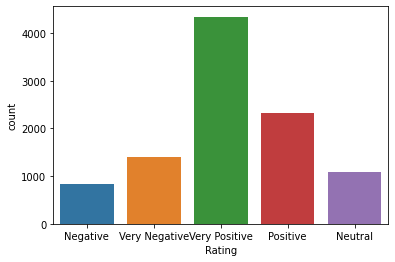

In [ ]:
import seaborn as sns
print(data['Rating'].value_counts())
sns.countplot(data.Rating)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['text'])
x_values = Tfidfvector.transform(data['text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Rating'])

In [ ]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb)))
report_nb = classification_report(y_test, predicted_nb, output_dict=True)
report_nb

Accuracy score is 0.554


{'0': {'f1-score': 0.062176165803108814,
  'precision': 0.6,
  'recall': 0.03278688524590164,
  'support': 183},
 '1': {'f1-score': 0.03361344537815126,
  'precision': 0.2857142857142857,
  'recall': 0.017857142857142856,
  'support': 224},
 '2': {'f1-score': 0.3372093023255814,
  'precision': 0.3625,
  'recall': 0.31521739130434784,
  'support': 460},
 '3': {'f1-score': 0.6321243523316062,
  'precision': 0.6140939597315436,
  'recall': 0.6512455516014235,
  'support': 281},
 '4': {'f1-score': 0.7230046948356808,
  'precision': 0.6025039123630673,
  'recall': 0.903755868544601,
  'support': 852},
 'accuracy': 0.554,
 'macro avg': {'f1-score': 0.3576255921348257,
  'precision': 0.4929624315617794,
  'recall': 0.3841725679106834,
  'support': 2000},
 'weighted avg': {'f1-score': 0.48382543609081174,
  'precision': 0.5132218680089486,
  'recall': 0.554,
  'support': 2000}}

I have selected the Naive Bayes and SVM. Below are metrics of the two models -
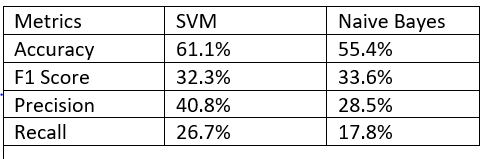


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
train_dataset = pd.read_csv("/content/train.csv")
test_dataset = pd.read_csv("/content/test.csv")

In [ ]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
print(test_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

In [ ]:
print(train_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
print(test_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


In [ ]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(list(test_dataset[column].values))

In [ ]:
x_values = train_dataset[train_dataset.columns[:80]] 

In [ ]:
x_test_values = test_dataset[test_dataset.columns[:80]]

In [ ]:
y_values = train_dataset['SalePrice']

In [ ]:
predicted = reg_model.predict(x_test_values)

In [ ]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
